In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
from datetime import datetime, timedelta
import time

warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv(
    "../clean data/delayed.csv", 
    parse_dates=['Booking Date', 'Trip Start Date', 'Planned ETA', 'Actual ETA', 'Trip End Date', 'Delivery Window Start', 'Delivery Window End']
)
data.head()

,Booking ID,Booking Date,Trip Start Date,Planned ETA,Actual ETA,Trip End Date,Origin Location,Origin Lat,Origin Lon,Stopover Location,...,Arrival Status,Delay Hours,Route Category,Avg Speed (KM/H),Consecutive_Driving_Days,Fatigue Risk,KM_Since_Last_Service,Needs_Service_Soon,Month,Year
0,f6c1a5a1-615c-493c-993a-be28ef04fd11,2019-09-04,2019-09-05 15:00:00,2019-09-08 16:09:28.824835,2019-09-08 19:10:24.974760,2019-09-08 22:11:38.474976,"Jacksonville, FL",30.33220,-81.655700,NaN,...,Delay,3.015597,Medium (1500-3500km),43.45,5,Medium,3310.01,False,September,2019
1,76df8cb0-c903-4d3a-95c0-5c7e5927e1a5,2023-11-26,2023-11-27 22:00:00,2023-12-02 07:00:26.340608,2023-12-02 12:21:44.322175,2023-12-02 16:57:43.785458,"New York, NY",40.71280,-74.006000,NaN,...,Delay,5.354995,Long (>3500km),35.10,8,High,3873.89,False,November,2023
2,7e33e37a-4341-4f01-af51-f1ff880df2b7,2024-03-03,2024-03-03 12:00:00,2024-03-09 12:59:15.131299,2024-03-08 23:46:23.722641,2024-03-09 02:41:25.600162,"Seattle, WA",47.60620,-122.332100,"Indianapolis, IN",...,On Time,-13.214280,Long (>3500km),39.11,23,High,5153.08,False,March,2024
3,14576d7f-63fd-444d-866b-f0fa3021939b,2024-03-05,2024-03-06 05:00:00,2024-03-10 11:33:48.718958,2024-03-10 05:58:42.648740,2024-03-10 09:45:02.501593,"Toronto, ON",43.65107,-79.347015,NaN,...,On Time,-5.585020,Long (>3500km),46.12,23,High,4472.62,False,March,2024
4,4e0f370e-0dd7-4401-a953-526a9e6f9542,2024-03-07,2024-03-08 05:00:00,2024-03-09 17:53:15.827066,2024-03-09 19:00:47.020994,2024-03-09 23:29:35.572049,"Fort Worth, TX",32.75550,-97.330800,NaN,...,On Time,1.125332,Medium (1500-3500km),47.29,23,High,1797.66,False,March,2024


In [24]:
data['Needs_Service_Soon'] = data['Needs_Service_Soon'].apply(lambda x: "Yes" if x else "No")
data.head()

,Booking ID,Booking Date,Trip Start Date,Planned ETA,Actual ETA,Trip End Date,Origin Location,Origin Lat,Origin Lon,Stopover Location,...,Arrival Status,Delay Hours,Route Category,Avg Speed (KM/H),Consecutive_Driving_Days,Fatigue Risk,KM_Since_Last_Service,Needs_Service_Soon,Month,Year
0,f6c1a5a1-615c-493c-993a-be28ef04fd11,2019-09-04,2019-09-05 15:00:00,2019-09-08 16:09:28.824835,2019-09-08 19:10:24.974760,2019-09-08 22:11:38.474976,"Jacksonville, FL",30.33220,-81.655700,NaN,...,Delay,3.015597,Medium (1500-3500km),43.45,5,Medium,3310.01,No,September,2019
1,76df8cb0-c903-4d3a-95c0-5c7e5927e1a5,2023-11-26,2023-11-27 22:00:00,2023-12-02 07:00:26.340608,2023-12-02 12:21:44.322175,2023-12-02 16:57:43.785458,"New York, NY",40.71280,-74.006000,NaN,...,Delay,5.354995,Long (>3500km),35.10,8,High,3873.89,No,November,2023
2,7e33e37a-4341-4f01-af51-f1ff880df2b7,2024-03-03,2024-03-03 12:00:00,2024-03-09 12:59:15.131299,2024-03-08 23:46:23.722641,2024-03-09 02:41:25.600162,"Seattle, WA",47.60620,-122.332100,"Indianapolis, IN",...,On Time,-13.214280,Long (>3500km),39.11,23,High,5153.08,No,March,2024
3,14576d7f-63fd-444d-866b-f0fa3021939b,2024-03-05,2024-03-06 05:00:00,2024-03-10 11:33:48.718958,2024-03-10 05:58:42.648740,2024-03-10 09:45:02.501593,"Toronto, ON",43.65107,-79.347015,NaN,...,On Time,-5.585020,Long (>3500km),46.12,23,High,4472.62,No,March,2024
4,4e0f370e-0dd7-4401-a953-526a9e6f9542,2024-03-07,2024-03-08 05:00:00,2024-03-09 17:53:15.827066,2024-03-09 19:00:47.020994,2024-03-09 23:29:35.572049,"Fort Worth, TX",32.75550,-97.330800,NaN,...,On Time,1.125332,Medium (1500-3500km),47.29,23,High,1797.66,No,March,2024


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333 entries, 0 to 5332
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking ID                5333 non-null   object        
 1   Booking Date              5333 non-null   datetime64[ns]
 2   Trip Start Date           5333 non-null   datetime64[ns]
 3   Planned ETA               5333 non-null   datetime64[ns]
 4   Actual ETA                5333 non-null   datetime64[ns]
 5   Trip End Date             5333 non-null   datetime64[ns]
 6   Origin Location           5333 non-null   object        
 7   Origin Lat                5333 non-null   float64       
 8   Origin Lon                5333 non-null   float64       
 9   Stopover Location         761 non-null    object        
 10  Stopover Lat              761 non-null    float64       
 11  Stopover Lon              761 non-null    float64       
 12  Destination Location

# EDA : DELAY ANALYSIS

In [26]:
data['Arrival Status'].value_counts()

Arrival Status
On Time    3053
Delay      2280
Name: count, dtype: int64

In [27]:
data['Arrival Status'].value_counts(normalize=True) * 100

Arrival Status
On Time    57.247328
Delay      42.752672
Name: proportion, dtype: float64

In [28]:
data[data['Arrival Status'] == 'Delay']['Shipment Type'].value_counts(normalize=True) * 100

Shipment Type
Express             28.771930
Priority            28.684211
Regular             22.719298
Special Handling    19.824561
Name: proportion, dtype: float64

In [29]:
express = data[data['Shipment Type'] == 'Express']
priority = data[data['Shipment Type'] == 'Priority']
special = data[data['Shipment Type'] == 'Special Handling']
regular = data[data['Shipment Type'] == 'Regular']

print(f"Express: {express.shape[0]}")
print(f"Priority: {priority.shape[0]}")
print(f"Special Handling: {special.shape[0]}")
print(f"Regular: {regular.shape[0]}")

Express: 1338
Priority: 1317
Special Handling: 1350
Regular: 1328


## EXPRESS ANALYSIS

In [30]:
express['Arrival Status'].value_counts(normalize = True) * 100

Arrival Status
On Time    50.971599
Delay      49.028401
Name: proportion, dtype: float64

In [31]:
express[express['Arrival Status'] == 'Delay']['Enroute Issues'].unique()

array([nan, 'Driver Issue', 'Border Issue', 'Incident', 'Route Delay',
       'Equipment Issue', 'Documentation Issue'], dtype=object)

In [32]:
express[express['Arrival Status'] == 'Delay']['Enroute Issues'].value_counts(normalize=True) * 100

Enroute Issues
Driver Issue           50.303030
Route Delay            16.969697
Incident               12.727273
Border Issue            9.090909
Documentation Issue     6.060606
Equipment Issue         4.848485
Name: proportion, dtype: float64

Over 50% of all Express shipment delays are caused by a Driver Issue, making it the single largest point of failure in the express delivery chain.

In [33]:
driver_summary = express.groupby('Driver Name').agg(
    total_trips=('Booking ID', 'count'),
    delayed_trips=('Arrival Status', lambda x: (x == 'Delay').sum()),
    average_delay_hours=('Delay Hours', 'mean'),
    total_delay_hours=('Delay Hours', 'sum'),
    avg_trip_duration=('Trip Duration (Hours)', 'mean'),
)

# Calculate delay percentage
driver_summary['delay_percentage'] = (driver_summary['delayed_trips'] / driver_summary['total_trips']) * 100

# Sort by delay percentage for visibility
driver_summary = driver_summary.sort_values(by='delay_percentage', ascending=False)

driver_summary.head(15)

,total_trips,delayed_trips,average_delay_hours,total_delay_hours,avg_trip_duration,delay_percentage
Driver Name,,,,,,
Jennifer Pena,2,2,3.187062,6.374124,31.496993,100.000000
Randy Sandoval,21,16,2.604976,54.704503,67.455921,76.190476
Bruce Hayes,4,3,0.007184,0.028736,88.427591,75.000000
Jerry Wheeler,14,10,2.787419,39.023861,63.809136,71.428571
Joseph Dean,27,19,2.437346,65.808354,68.485880,70.370370
James Goodman,13,9,1.484935,19.304154,67.662149,69.230769
Claudia Wallace,9,6,1.317533,11.857800,100.153274,66.666667
Sarah Robinson,23,15,1.068192,24.568414,60.937677,65.217391
Robin Hall,20,13,1.764784,35.295676,55.577102,65.000000


#### Jennifer Pena

In [34]:
driver_summary = data.groupby('Driver Name').agg(
    total_trips=('Booking ID', 'count'),
    delayed_trips=('Arrival Status', lambda x: (x == 'Delay').sum()),
    average_delay_hours=('Delay Hours', 'mean'),
    total_delay_hours=('Delay Hours', 'sum'),
    avg_trip_duration=('Trip Duration (Hours)', 'mean'),
)

# Calculate delay percentage
driver_summary['delay_percentage'] = (driver_summary['delayed_trips'] / driver_summary['total_trips']) * 100

# Sort by delay percentage for visibility
driver_summary = driver_summary.sort_values(by='delay_percentage', ascending=False)

driver_summary.head(25)

,total_trips,delayed_trips,average_delay_hours,total_delay_hours,avg_trip_duration,delay_percentage
Driver Name,,,,,,
Bruce Hayes,16,10,1.719738,27.515812,73.071629,62.500000
Jerry Wheeler,45,26,2.123618,95.562793,69.379987,57.777778
Cynthia Walter,64,35,1.394046,89.218968,64.981347,54.687500
James Goodman,49,26,0.721187,35.338185,67.414823,53.061224
Jamie Martin,34,18,1.739919,59.157262,72.967671,52.941176
Sarah Robinson,91,47,1.292378,117.606370,63.257240,51.648352
James Harmon,71,36,1.416570,100.576504,71.880841,50.704225
Jacqueline Wolfe,107,54,1.133890,121.326238,64.504812,50.467290
Alexis Herrera,24,12,1.207611,28.982665,60.244428,50.000000


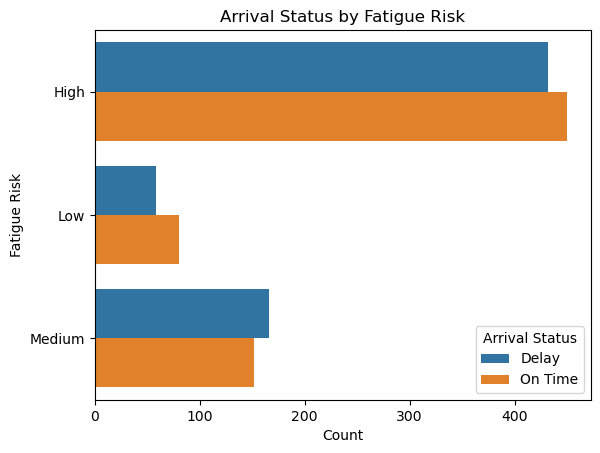

In [35]:
grouped_data = express.groupby(['Fatigue Risk', 'Arrival Status']).size().reset_index(name='Count')
sns.barplot(data=grouped_data, y='Fatigue Risk', x='Count', hue='Arrival Status')
plt.title('Arrival Status by Fatigue Risk')
plt.show()

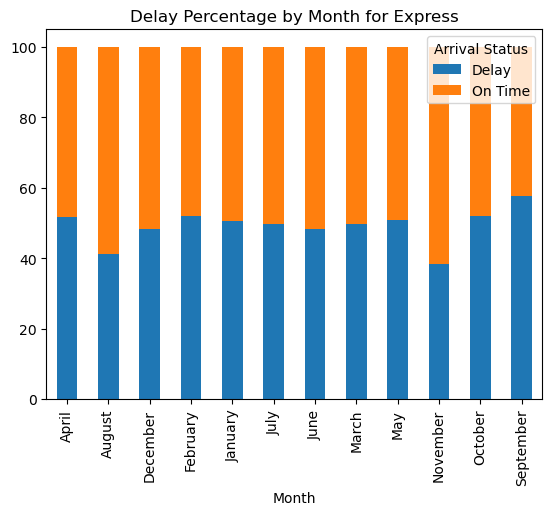

In [36]:
monthly_delays = express.groupby('Month')['Arrival Status'].value_counts(normalize=True).unstack() * 100
monthly_delays.plot(kind='bar', stacked=True)
plt.title('Delay Percentage by Month for Express')
plt.show()

In [37]:
fatigue_delays = express.groupby(['Driver Name', 'Fatigue Risk'])['Arrival Status'].value_counts().unstack().fillna(0)
fatigue_delays

Arrival Status                 Delay  On Time
Driver Name      Fatigue Risk                
Alexis Baker     Low             1.0      0.0
                 Medium          2.0      2.0
Alexis Herrera   High            0.0      4.0
                 Medium          2.0      1.0
Alfred Galvan    High            0.0      2.0
...                              ...      ...
Wanda Torres     High            3.0      3.0
                 Low             0.0      1.0
                 Medium          2.0      3.0
William Cardenas High            0.0      3.0
                 Medium          1.0      1.0

[191 rows x 2 columns]

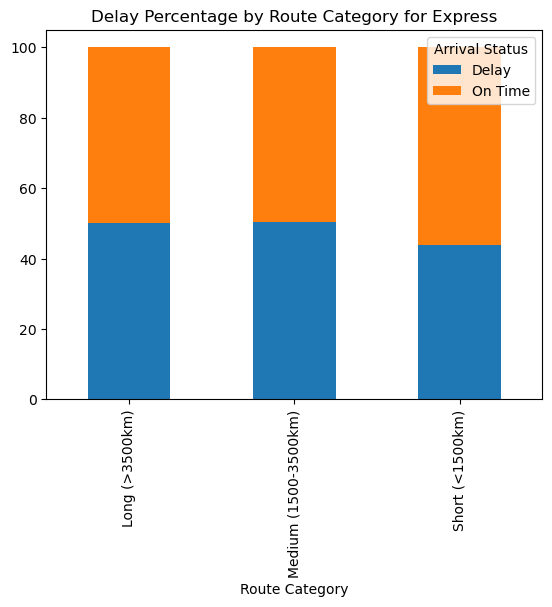

In [38]:
route_delays = express.groupby('Route Category')['Arrival Status'].value_counts(normalize=True).unstack() * 100
route_delays.plot(kind='bar', stacked=True)
plt.title('Delay Percentage by Route Category for Express')
plt.show()

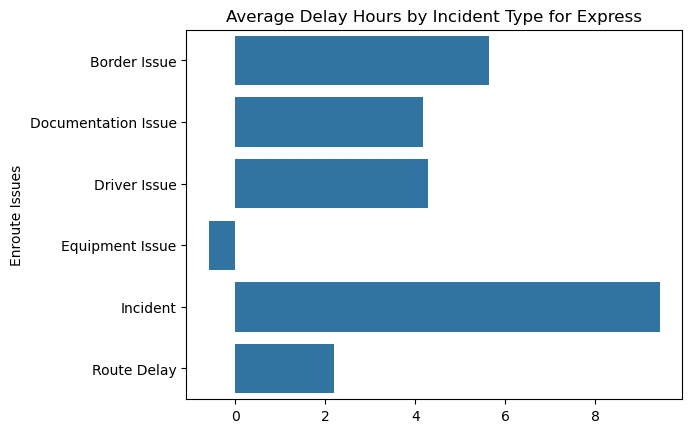

In [39]:
incident_delays = express[express['Enroute Issues'].notnull()].groupby('Enroute Issues')['Delay Hours'].mean()
sns.barplot(x=incident_delays.values, y=incident_delays.index)
plt.title('Average Delay Hours by Incident Type for Express')
plt.show()

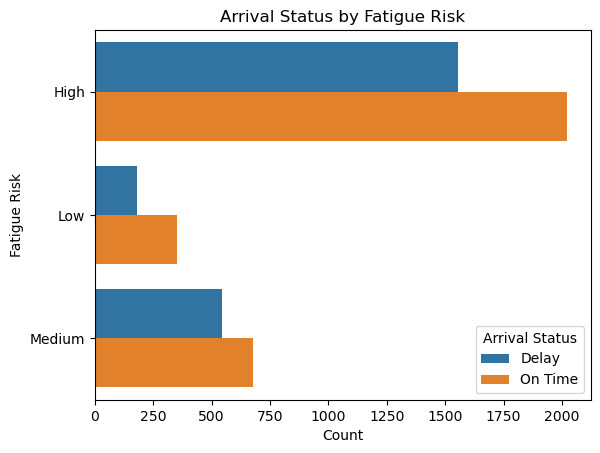

In [40]:
grouped_data = data.groupby(['Fatigue Risk', 'Arrival Status']).size().reset_index(name='Count')
sns.barplot(data=grouped_data, y='Fatigue Risk', x='Count', hue='Arrival Status')
plt.title('Arrival Status by Fatigue Risk')
plt.show()

Shockingly those that a considered to be fatigued, travelling 5+ days tend to arrive on time. 

In [41]:
data['Inefficency'] = data['Road Distance (KM)'] - data['Distance (KM)']
data['Inefficency'].describe()

count    5333.000000
mean      -75.753023
std        66.522319
min      -496.540000
25%      -110.380000
50%       -59.280000
75%       -23.390000
max        67.230000
Name: Inefficency, dtype: float64